## Import required liabraries

In [61]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## loading dataset

In [62]:
df = pd.read_csv("insurance.csv")
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

## data preprocessing

In [63]:
df.shape

(1338, 7)

In [64]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

<AxesSubplot:>

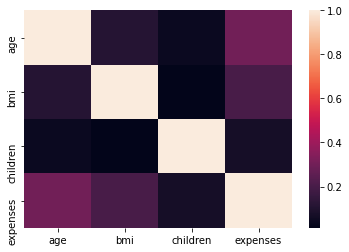

In [67]:
corr = df.corr()
sn.heatmap(corr)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

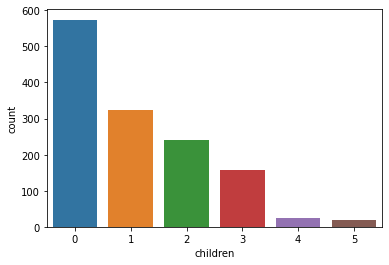

In [68]:
sn.countplot(df.children)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

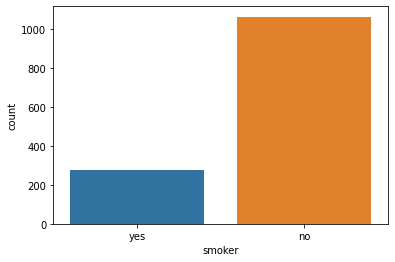

In [69]:
sn.countplot(df.smoker)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

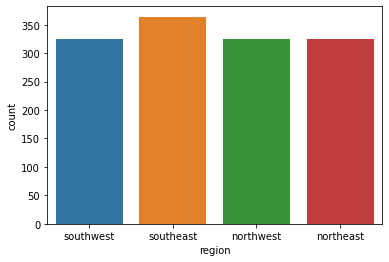

In [70]:
sn.countplot(df.region)

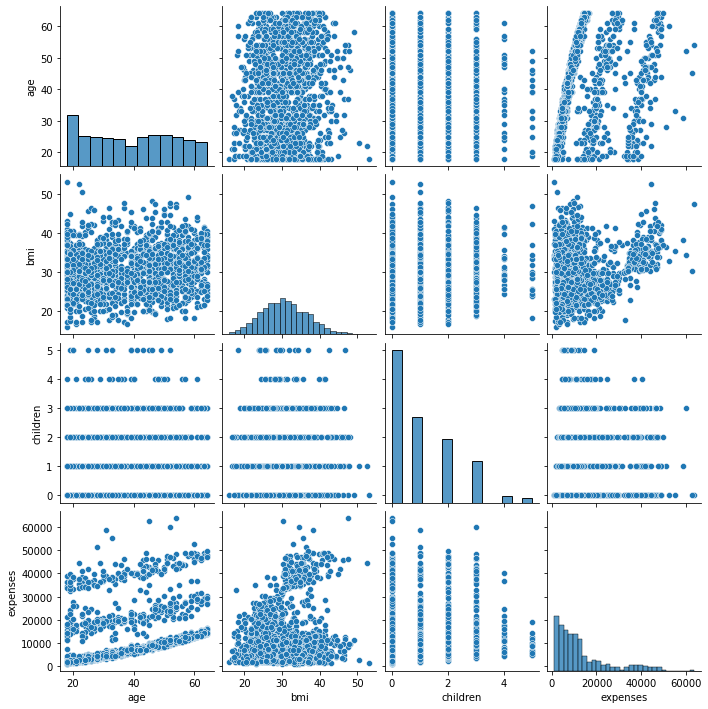

In [71]:
sn.pairplot(df)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


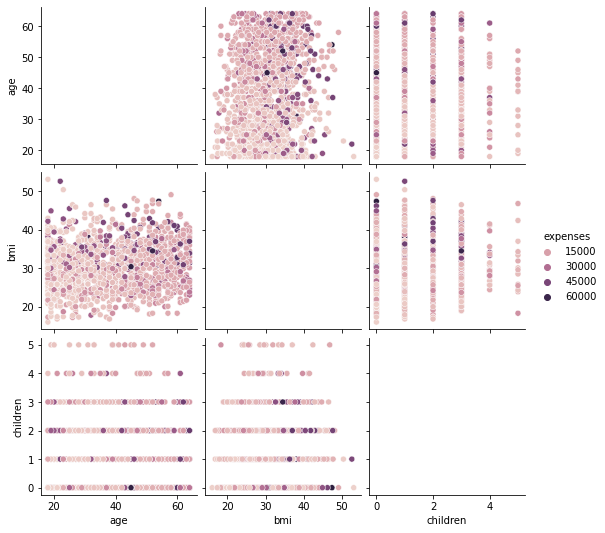

In [72]:
sn.pairplot(df, 'expenses')

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


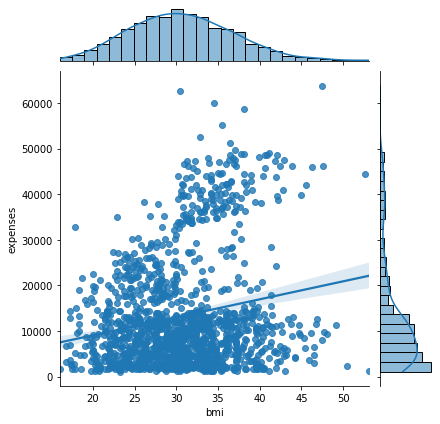

In [73]:
sn.jointplot('bmi', 'expenses', data=df, kind = 'reg')

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


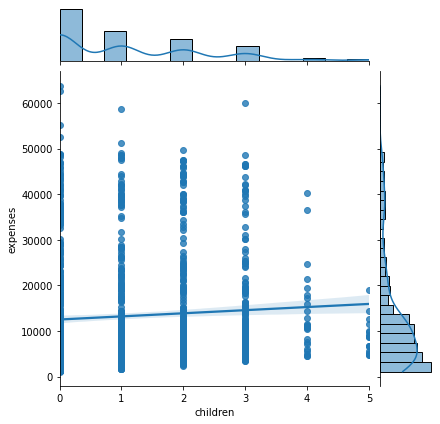

In [74]:
sn.jointplot('children', 'expenses', data=df, kind = 'reg')

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

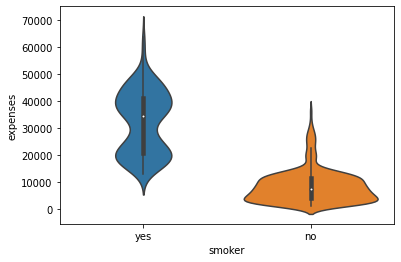

In [75]:
sn.violinplot(y='expenses', x='smoker', data=df)

<AxesSubplot:xlabel='children', ylabel='expenses'>

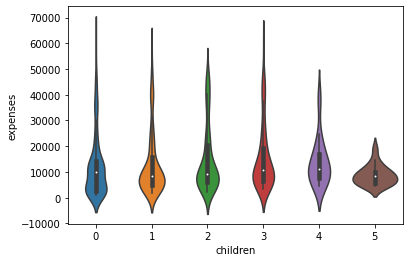

In [76]:
sn.violinplot(y='expenses', x='children', data=df)

## convert all columns in number

In [77]:
data = df.replace({'sex':{'male':1 ,'female':0}})
data = data.replace({'smoker':{'yes':1, 'no':0}})
data = data.replace({'region':{'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}})
data

age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       1  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       3  21984.47
4      32    1  28.9         0       0       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       3  10600.55
1334   18    0  31.9         0       0       4   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       1   2007.95
1337   61    0  29.1         0       1       3  29141.36

[1338 rows x 7 columns]

## separate the data into dependant and independant variable

In [78]:
X = data.drop('expenses', axis='columns')
y = data.expenses

In [79]:
X

age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       1
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       3
4      32    1  28.9         0       0       3
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       3
1334   18    0  31.9         0       0       4
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       1
1337   61    0  29.1         0       1       3

[1338 rows x 6 columns]

In [80]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

## data splitting into training and testing with 80% & 20%

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
X_train.shape

(1070, 6)

In [83]:
y_train.shape

(1070,)

In [84]:
X_train.head()

age  sex   bmi  children  smoker  region
1144   50    1  32.3         2       0       1
399    18    0  38.2         0       0       2
331    52    1  27.4         0       1       3
416    52    1  34.1         0       0       2
618    19    0  33.1         0       1       2

In [85]:
y_train.head()

1144     9630.40
399      1631.67
331     24393.62
416      9140.95
618     34439.86
Name: expenses, dtype: float64

# Linear Regression model

In [86]:
model = LinearRegression()

In [87]:
## train the model
model.fit(X_train, y_train)

LinearRegression()

In [88]:
## prediction
y_pred = model.predict(X_test)
y_pred

array([ 1122.38307505, 12310.56479954,  2610.04802056,  9453.1116029 ,
        2632.00577041,  9275.40542207,  2484.49439065,  4873.53229341,
       33128.03609957,  5713.95075699, 11865.49078826, 10331.83757806,
       -1303.26020408,  3210.9879361 , 10945.67112377, 10825.74829326,
         934.39256577, 14678.76767749, 12263.50757976, 10212.74342403,
       25976.91524147, 10452.35108863,  6134.1424649 , -1864.15867385,
        4350.59505212, 39769.88775341,  6234.64026604, 14738.08564807,
        7728.86018974, 26840.09930151,  8295.99456831,  7817.85839565,
       10098.81850591, 36848.17280949, 14367.21972206,  1518.2723567 ,
        6808.78927752, 11505.38125638,  5245.70707973, 13390.05660055,
        9412.21645981, 11126.55179859,  3430.97393386, 14710.22693002,
        4509.51653524,  6250.89224327,  4293.93747671,  9533.91830752,
        6955.72352928,  5345.09151692, 10727.17200344,  5758.16144633,
       30671.13926569, 14887.95173117, 33183.06735331, 11362.17856443,
      

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
## calculate mean suaqred error
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))

Mean Squared Error is: 36724661.65215592
Accuracy: 0.7651589374606431


# Decision Tree 

In [91]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
pred = model_dt.predict(X_test)
pred

array([ 1708.93,  6496.89,  1622.19, 11345.52,  1639.56,  4320.41,
        1906.36,  1631.67, 39597.41,  5002.78, 11881.97,  7954.52,
        1241.57,  1906.36, 12096.65, 12032.33,  1635.73, 13462.52,
       12622.18,  9563.03, 16776.3 ,  4266.17,  3943.6 ,  1702.46,
        2801.26, 48675.52,  3659.35,  9541.7 ,  7623.52, 16776.3 ,
        6067.13,  4949.76,  4795.66, 26926.51, 10825.25,  3558.62,
        5080.1 , 10231.5 ,  3227.12, 20709.02,  7742.11,  5415.66,
        3161.45, 10450.55,  3756.62,  6686.43,  5354.07,  7418.52,
        3935.18,  1633.04, 10797.34,  4074.45, 21098.55, 13224.06,
       40419.02,  8116.27, 24667.42, 17179.52, 23244.79, 12268.63,
        9617.66,  2134.9 , 10601.41,  8017.06,  4846.92, 40419.02,
        4518.83,  7445.92,  9144.57, 11093.62,  2913.57, 12557.61,
        9861.03, 40419.02,  2155.68, 23241.47, 32108.66,  3594.17,
        2221.56,  3206.49, 22218.11, 13228.85,  5373.36,  8428.07,
       25081.77,  1969.61,  6338.08, 23045.57,  4890.  ,  3176

In [92]:
print('Mean Squared Error is:', mean_squared_error(y_test, pred))
print("Accuracy:", model_dt.score(X_test, y_test))

Mean Squared Error is: 43649879.7017362
Accuracy: 0.7208746475062742


In [93]:
if mean_squared_error(y_test, pred) >  mean_squared_error(y_test, y_pred):
    print("Linear Reression gives better accuracy")
else:
    print("Decision Tree gives better accuracy")

Linear Reression gives better accuracy


# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
modl = RandomForestRegressor()
modl.fit(X_train, y_train)
pr = modl.predict(X_test)
print('Mean Squared Error is:', mean_squared_error(y_test, pr))


Mean Squared Error is: 28763442.547398403


In [95]:
modl.score(X_test, y_test)

0.8160680832378957

In [96]:
if mean_squared_error(y_test, pr) >  mean_squared_error(y_test, y_pred):
    print("Linear Reression gives better accuracy")
else:
    print("Random Forest gives better accuracy")

Random Forest gives better accuracy


## Gradient Boosting Regressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
print("Gradient Boosting mean Squared error is:", mean_squared_error(y_test, pred_gb))
print("Accuracy:", gb.score(X_test, y_test))

Gradient Boosting mean Squared error is: 24873374.19417891
Accuracy: 0.8409436775748461


(-1994.6610000000003, 66902.101, -1821.8389285455423, 67074.92307145445)

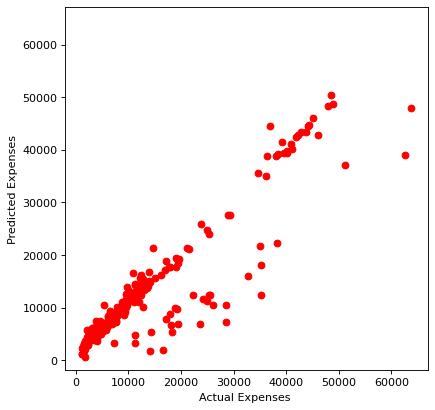

In [99]:
plt.figure(figsize=(8, 6), dpi=80)
g=plt.scatter(y_test, pred_gb, color="red")
g.axes.set_xlabel('Actual Expenses ')
g.axes.set_ylabel('Predicted Expenses')
g.axes.axis('equal')
g.axes.axis('square')

## convert model into pickle file

In [101]:
import pickle
pickle.dump(gb, open('insurance.pkl', 'wb'))
gb=pickle.load(open('insurance.pkl','rb'))
print(modl.predict([[19, 0, 27.9, 0, 1, 1]]))

[17062.8779]
